In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
data=pd.read_excel("C:\\Users\\SAI BABA\\Desktop\\attritiondata.xlsx")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data.shape

(1470, 35)

In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [9]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# DATA ENCODING

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()
label=le.fit_transform(data["Attrition"])
label

array([1, 0, 1, ..., 0, 0, 0])

In [12]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [13]:
data=data.drop("Attrition",axis='columns')

In [14]:
data["Attrition"]=label

In [15]:
data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,0
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,0
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,0
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,0


In [16]:
le=LabelEncoder()
label=le.fit_transform(data["BusinessTravel"])
label
data=data.drop("BusinessTravel",axis='columns')
data["BusinessTravel"]=label
data

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel
0,41,1102,Sales,1,2,Life Sciences,1,1,2,Female,...,0,8,0,1,6,4,0,5,1,2
1,49,279,Research & Development,8,1,Life Sciences,1,2,3,Male,...,1,10,3,3,10,7,1,7,0,1
2,37,1373,Research & Development,2,2,Other,1,4,4,Male,...,0,7,3,3,0,0,0,0,1,2
3,33,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,...,0,8,3,3,8,7,3,0,0,1
4,27,591,Research & Development,2,1,Medical,1,7,1,Male,...,1,6,3,3,2,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,Research & Development,23,2,Medical,1,2061,3,Male,...,1,17,3,3,5,2,0,3,0,1
1466,39,613,Research & Development,6,1,Medical,1,2062,4,Male,...,1,9,5,3,7,7,1,7,0,2
1467,27,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,...,1,6,0,3,6,2,0,3,0,2
1468,49,1023,Sales,2,3,Medical,1,2065,4,Male,...,0,17,3,2,9,6,0,8,0,1


In [17]:
le=LabelEncoder()
label=le.fit_transform(data["Department"])
label
data=data.drop("Department",axis='columns')
data["Department"]=label
data

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department
0,41,1102,1,2,Life Sciences,1,1,2,Female,94,...,8,0,1,6,4,0,5,1,2,2
1,49,279,8,1,Life Sciences,1,2,3,Male,61,...,10,3,3,10,7,1,7,0,1,1
2,37,1373,2,2,Other,1,4,4,Male,92,...,7,3,3,0,0,0,0,1,2,1
3,33,1392,3,4,Life Sciences,1,5,4,Female,56,...,8,3,3,8,7,3,0,0,1,1
4,27,591,2,1,Medical,1,7,1,Male,40,...,6,3,3,2,2,2,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,Medical,1,2061,3,Male,41,...,17,3,3,5,2,0,3,0,1,1
1466,39,613,6,1,Medical,1,2062,4,Male,42,...,9,5,3,7,7,1,7,0,2,1
1467,27,155,4,3,Life Sciences,1,2064,2,Male,87,...,6,0,3,6,2,0,3,0,2,1
1468,49,1023,2,3,Medical,1,2065,4,Male,63,...,17,3,2,9,6,0,8,0,1,2


In [18]:
le=LabelEncoder()
label=le.fit_transform(data["EducationField"])
label
data=data.drop("EducationField",axis='columns')
data["EducationField"]=label
data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField
0,41,1102,1,2,1,1,2,Female,94,3,...,0,1,6,4,0,5,1,2,2,1
1,49,279,8,1,1,2,3,Male,61,2,...,3,3,10,7,1,7,0,1,1,1
2,37,1373,2,2,1,4,4,Male,92,2,...,3,3,0,0,0,0,1,2,1,4
3,33,1392,3,4,1,5,4,Female,56,3,...,3,3,8,7,3,0,0,1,1,1
4,27,591,2,1,1,7,1,Male,40,3,...,3,3,2,2,2,2,0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,Male,41,4,...,3,3,5,2,0,3,0,1,1,3
1466,39,613,6,1,1,2062,4,Male,42,2,...,5,3,7,7,1,7,0,2,1,3
1467,27,155,4,3,1,2064,2,Male,87,4,...,0,3,6,2,0,3,0,2,1,1
1468,49,1023,2,3,1,2065,4,Male,63,2,...,3,2,9,6,0,8,0,1,2,3


In [19]:
le=LabelEncoder()
label=le.fit_transform(data["Gender"])
label
data=data.drop("Gender",axis='columns')
data["Gender"]=label
data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender
0,41,1102,1,2,1,1,2,94,3,2,...,1,6,4,0,5,1,2,2,1,0
1,49,279,8,1,1,2,3,61,2,2,...,3,10,7,1,7,0,1,1,1,1
2,37,1373,2,2,1,4,4,92,2,1,...,3,0,0,0,0,1,2,1,4,1
3,33,1392,3,4,1,5,4,56,3,1,...,3,8,7,3,0,0,1,1,1,0
4,27,591,2,1,1,7,1,40,3,1,...,3,2,2,2,2,0,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,5,2,0,3,0,1,1,3,1
1466,39,613,6,1,1,2062,4,42,2,3,...,3,7,7,1,7,0,2,1,3,1
1467,27,155,4,3,1,2064,2,87,4,2,...,3,6,2,0,3,0,2,1,1,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,2,9,6,0,8,0,1,2,3,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   DailyRate                 1470 non-null   int64 
 2   DistanceFromHome          1470 non-null   int64 
 3   Education                 1470 non-null   int64 
 4   EmployeeCount             1470 non-null   int64 
 5   EmployeeNumber            1470 non-null   int64 
 6   EnvironmentSatisfaction   1470 non-null   int64 
 7   HourlyRate                1470 non-null   int64 
 8   JobInvolvement            1470 non-null   int64 
 9   JobLevel                  1470 non-null   int64 
 10  JobRole                   1470 non-null   object
 11  JobSatisfaction           1470 non-null   int64 
 12  MaritalStatus             1470 non-null   object
 13  MonthlyIncome             1470 non-null   int64 
 14  MonthlyRate             

In [21]:
le=LabelEncoder()
label=le.fit_transform(data["JobRole"])
label
data=data.drop("JobRole",axis='columns')
data["JobRole"]=label


In [22]:
le=LabelEncoder()
label=le.fit_transform(data["MaritalStatus"])
label
data=data.drop("MaritalStatus",axis='columns')
data["MaritalStatus"]=label


In [23]:
le=LabelEncoder()
label=le.fit_transform(data["Over18"])
label
data=data.drop("Over18",axis='columns')
data["Over18"]=label


In [24]:
le=LabelEncoder()
label=le.fit_transform(data["OverTime"])
label
data=data.drop("OverTime",axis='columns')
data["OverTime"]=label
data


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,5,1,2,2,1,0,7,2,0,1
1,49,279,8,1,1,2,3,61,2,2,...,7,0,1,1,1,1,6,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1,2,1,4,1,2,2,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,1,1,0,6,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,2,0,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,0,1,1,3,1,2,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,7,0,2,1,3,1,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,3,0,2,1,1,1,4,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,8,0,1,2,3,1,7,1,0,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

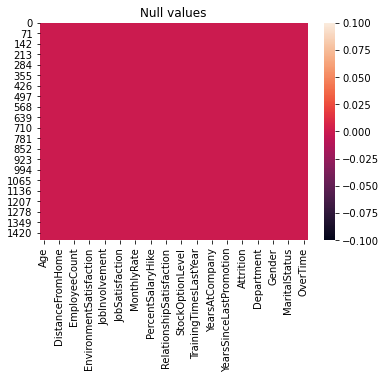

In [26]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

no NULL values

In [27]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,4.123129,0.161224,1.607483,1.260544,2.247619,0.600000,4.458503,1.097279,0.0,0.282993
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,3.568136,0.367863,0.665455,0.527792,1.331369,0.490065,2.461821,0.730121,0.0,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.0,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,0.000000,2.000000,1.000000,2.000000,1.000000,5.000000,1.000000,0.0,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,7.000000,0.000000,2.000000,2.000000,3.000000,1.000000,7.000000,2.000000,0.0,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,17.000000,1.000000,2.000000,2.000000,5.000000,1.000000,8.000000,2.000000,0.0,1.000000


In [28]:
data.isna().sum()

Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
BusinessTravel              0
Department                  0
EducationField              0
Gender                      0
JobRole                     0
MaritalStatus               0
Over18    

In [29]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.202089,-0.159205,0.024751,-0.031882,-0.040873,-0.036311,-0.122427,-0.095029,NaN,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,-0.026363,-0.056652,-0.004086,0.007109,0.037709,-0.011716,-0.009472,-0.069586,NaN,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.014406,0.077924,-0.024469,0.017225,0.002013,-0.001851,-0.001015,-0.014437,NaN,0.025514
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,0.069065,-0.031373,0.000757,0.007996,-0.039592,-0.016547,0.004236,0.004053,NaN,-0.020322
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.009197,-0.010577,-0.015578,-0.010895,-0.002516,0.022556,-0.010336,-0.008155,NaN,-0.024037
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.004999,-0.103369,0.004174,-0.019395,0.043163,0.000508,-0.017321,-0.003593,NaN,0.070132
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.020123,-0.006846,0.026528,-0.004144,-0.021941,-0.000478,-0.018861,-0.017861,NaN,-0.007782
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.025976,-0.130016,0.039062,-0.024586,-0.002655,0.017960,0.006616,-0.038497,NaN,-0.003507
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.375281,-0.169105,0.019311,0.101963,-0.044933,-0.039403,-0.085457,-0.076769,NaN,0.000544


<AxesSubplot:>

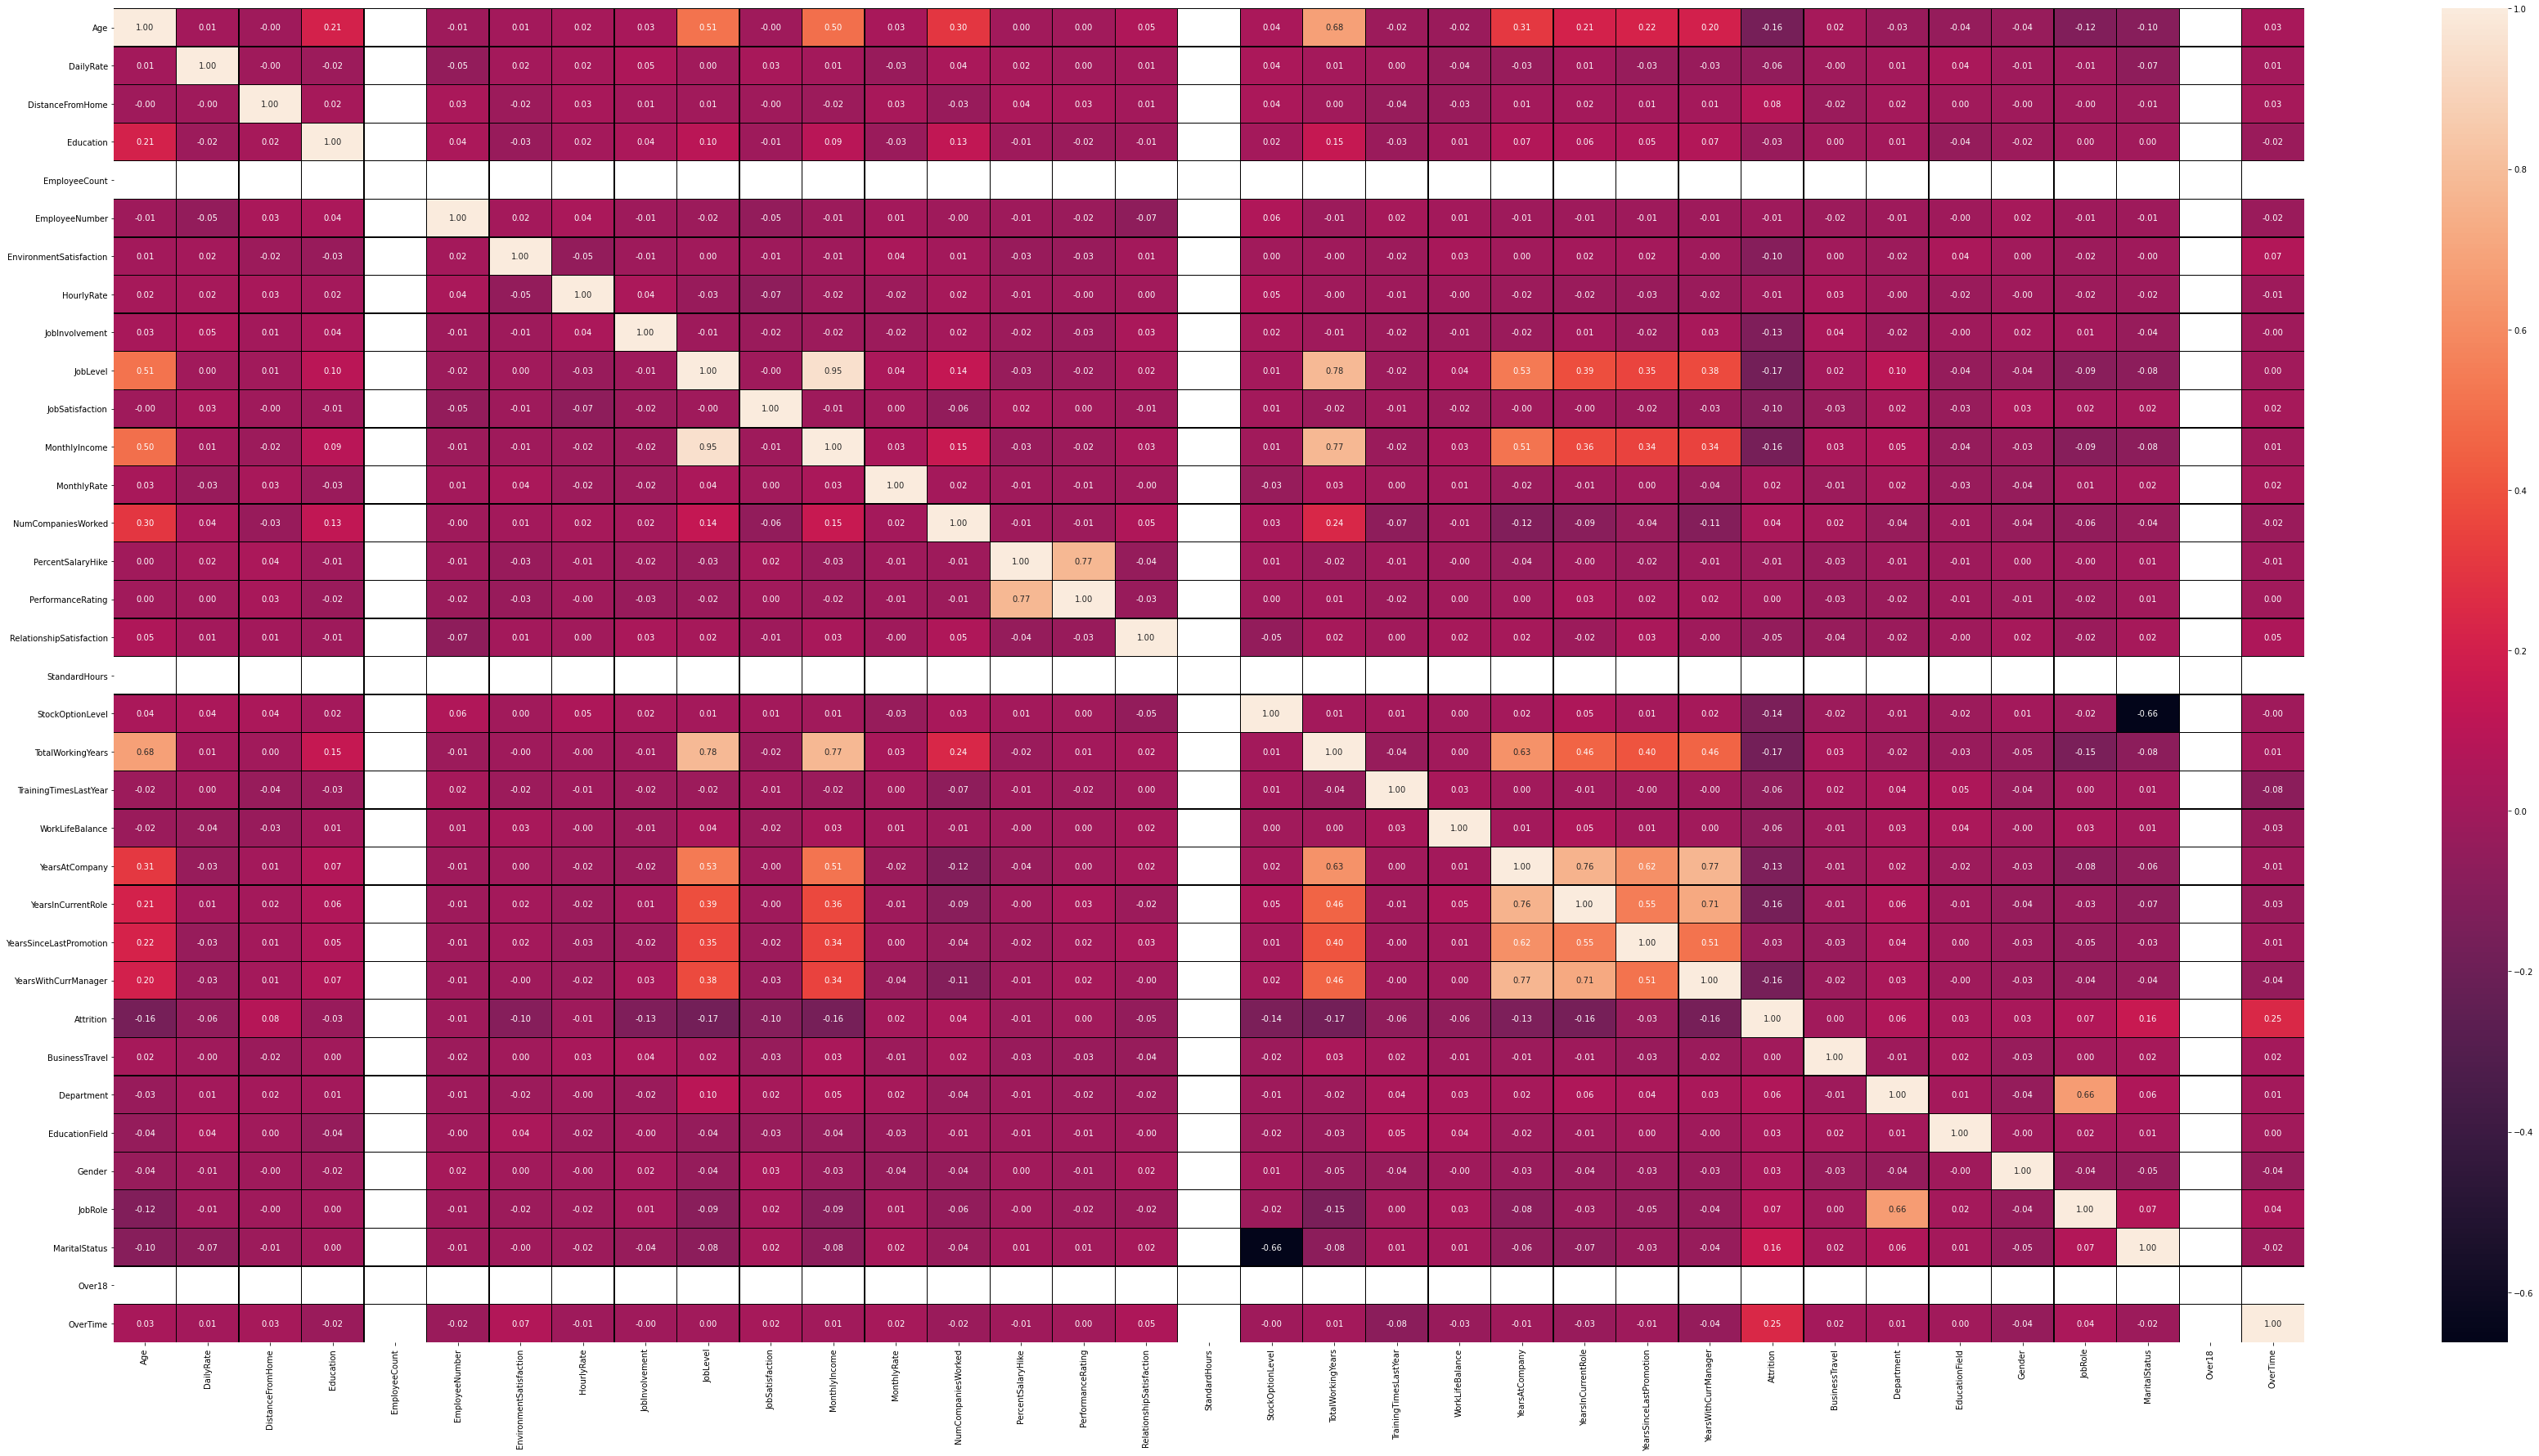

In [30]:
#heat map
plt.figure(figsize=(60,30))
sns.heatmap(data.corr(),annot=True,linewidths=0.3,linecolor='black',fmt='0.2f')

as Over18,standardhours,employee count has no values will drop them

In [31]:
data.drop(['Over18','StandardHours','EmployeeCount','PerformanceRating','BusinessTravel'],axis=1,inplace=True)
data

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,1,2,94,3,2,4,...,4,0,5,1,2,1,0,7,2,1
1,49,279,8,1,2,3,61,2,2,2,...,7,1,7,0,1,1,1,6,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,1,1,4,1,2,2,1
3,33,1392,3,4,5,4,56,3,1,3,...,7,3,0,0,1,1,0,6,1,1
4,27,591,2,1,7,1,40,3,1,2,...,2,2,2,0,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,2,0,3,0,1,3,1,2,1,0
1466,39,613,6,1,2062,4,42,2,3,1,...,7,1,7,0,1,3,1,0,1,0
1467,27,155,4,3,2064,2,87,4,2,2,...,2,0,3,0,1,1,1,4,1,1
1468,49,1023,2,3,2065,4,63,2,2,2,...,6,0,8,0,2,3,1,7,1,0


In [32]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,4.229252,2.187755,4.123129,0.161224,1.260544,2.247619,0.600000,4.458503,1.097279,0.282993
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,3.623137,3.222430,3.568136,0.367863,0.527792,1.331369,0.490065,2.461821,0.730121,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,1.000000,3.000000,0.000000,1.000000,2.000000,1.000000,5.000000,1.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,7.000000,3.000000,7.000000,0.000000,2.000000,3.000000,1.000000,7.000000,2.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,18.000000,15.000000,17.000000,1.000000,2.000000,5.000000,1.000000,8.000000,2.000000,1.000000


In [33]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.212901,0.216513,0.202089,-0.159205,-0.031882,-0.040873,-0.036311,-0.122427,-0.095029,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.009932,-0.033229,-0.026363,-0.056652,0.007109,0.037709,-0.011716,-0.009472,-0.069586,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.018845,0.010029,0.014406,0.077924,0.017225,0.002013,-0.001851,-0.001015,-0.014437,0.025514
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,0.060236,0.054254,0.069065,-0.031373,0.007996,-0.039592,-0.016547,0.004236,0.004053,-0.020322
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.008416,-0.009019,-0.009197,-0.010577,-0.010895,-0.002516,0.022556,-0.010336,-0.008155,-0.024037
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,0.018007,0.016194,-0.004999,-0.103369,-0.019395,0.043163,0.000508,-0.017321,-0.003593,0.070132
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.024106,-0.026716,-0.020123,-0.006846,-0.004144,-0.021941,-0.000478,-0.018861,-0.017861,-0.007782
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,0.008717,-0.024184,0.025976,-0.130016,-0.024586,-0.002655,0.017960,0.006616,-0.038497,-0.003507
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,0.389447,0.353885,0.375281,-0.169105,0.101963,-0.044933,-0.039403,-0.085457,-0.076769,0.000544
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,-0.002305,-0.018214,-0.027656,-0.103481,0.021001,-0.034401,0.033252,0.017537,0.024360,0.024539


In [34]:
#replacing zero value with mean of column
data['YearsInCurrentRole']=data['YearsInCurrentRole'].replace(0,data['YearsInCurrentRole'].mean())
data['YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].replace(0,data['YearsSinceLastPromotion'].mean())
data['YearsWithCurrManager']=data['YearsWithCurrManager'].replace(0,data['YearsWithCurrManager'].mean())
data['Department']=data['Department'].replace(0,data['Department'].mean())
data['EducationField']=data['EducationField'].replace(0,data['EducationField'].mean())
data['Gender']=data['Gender'].replace(0,data['Gender'].mean())
data['JobRole']=data['JobRole'].replace(0,data['JobRole'].mean())
data['MaritalStatus']=data['MaritalStatus'].replace(0,data['MaritalStatus'].mean())
data['OverTime']=data['OverTime'].replace(0,data['OverTime'].mean())


<AxesSubplot:>

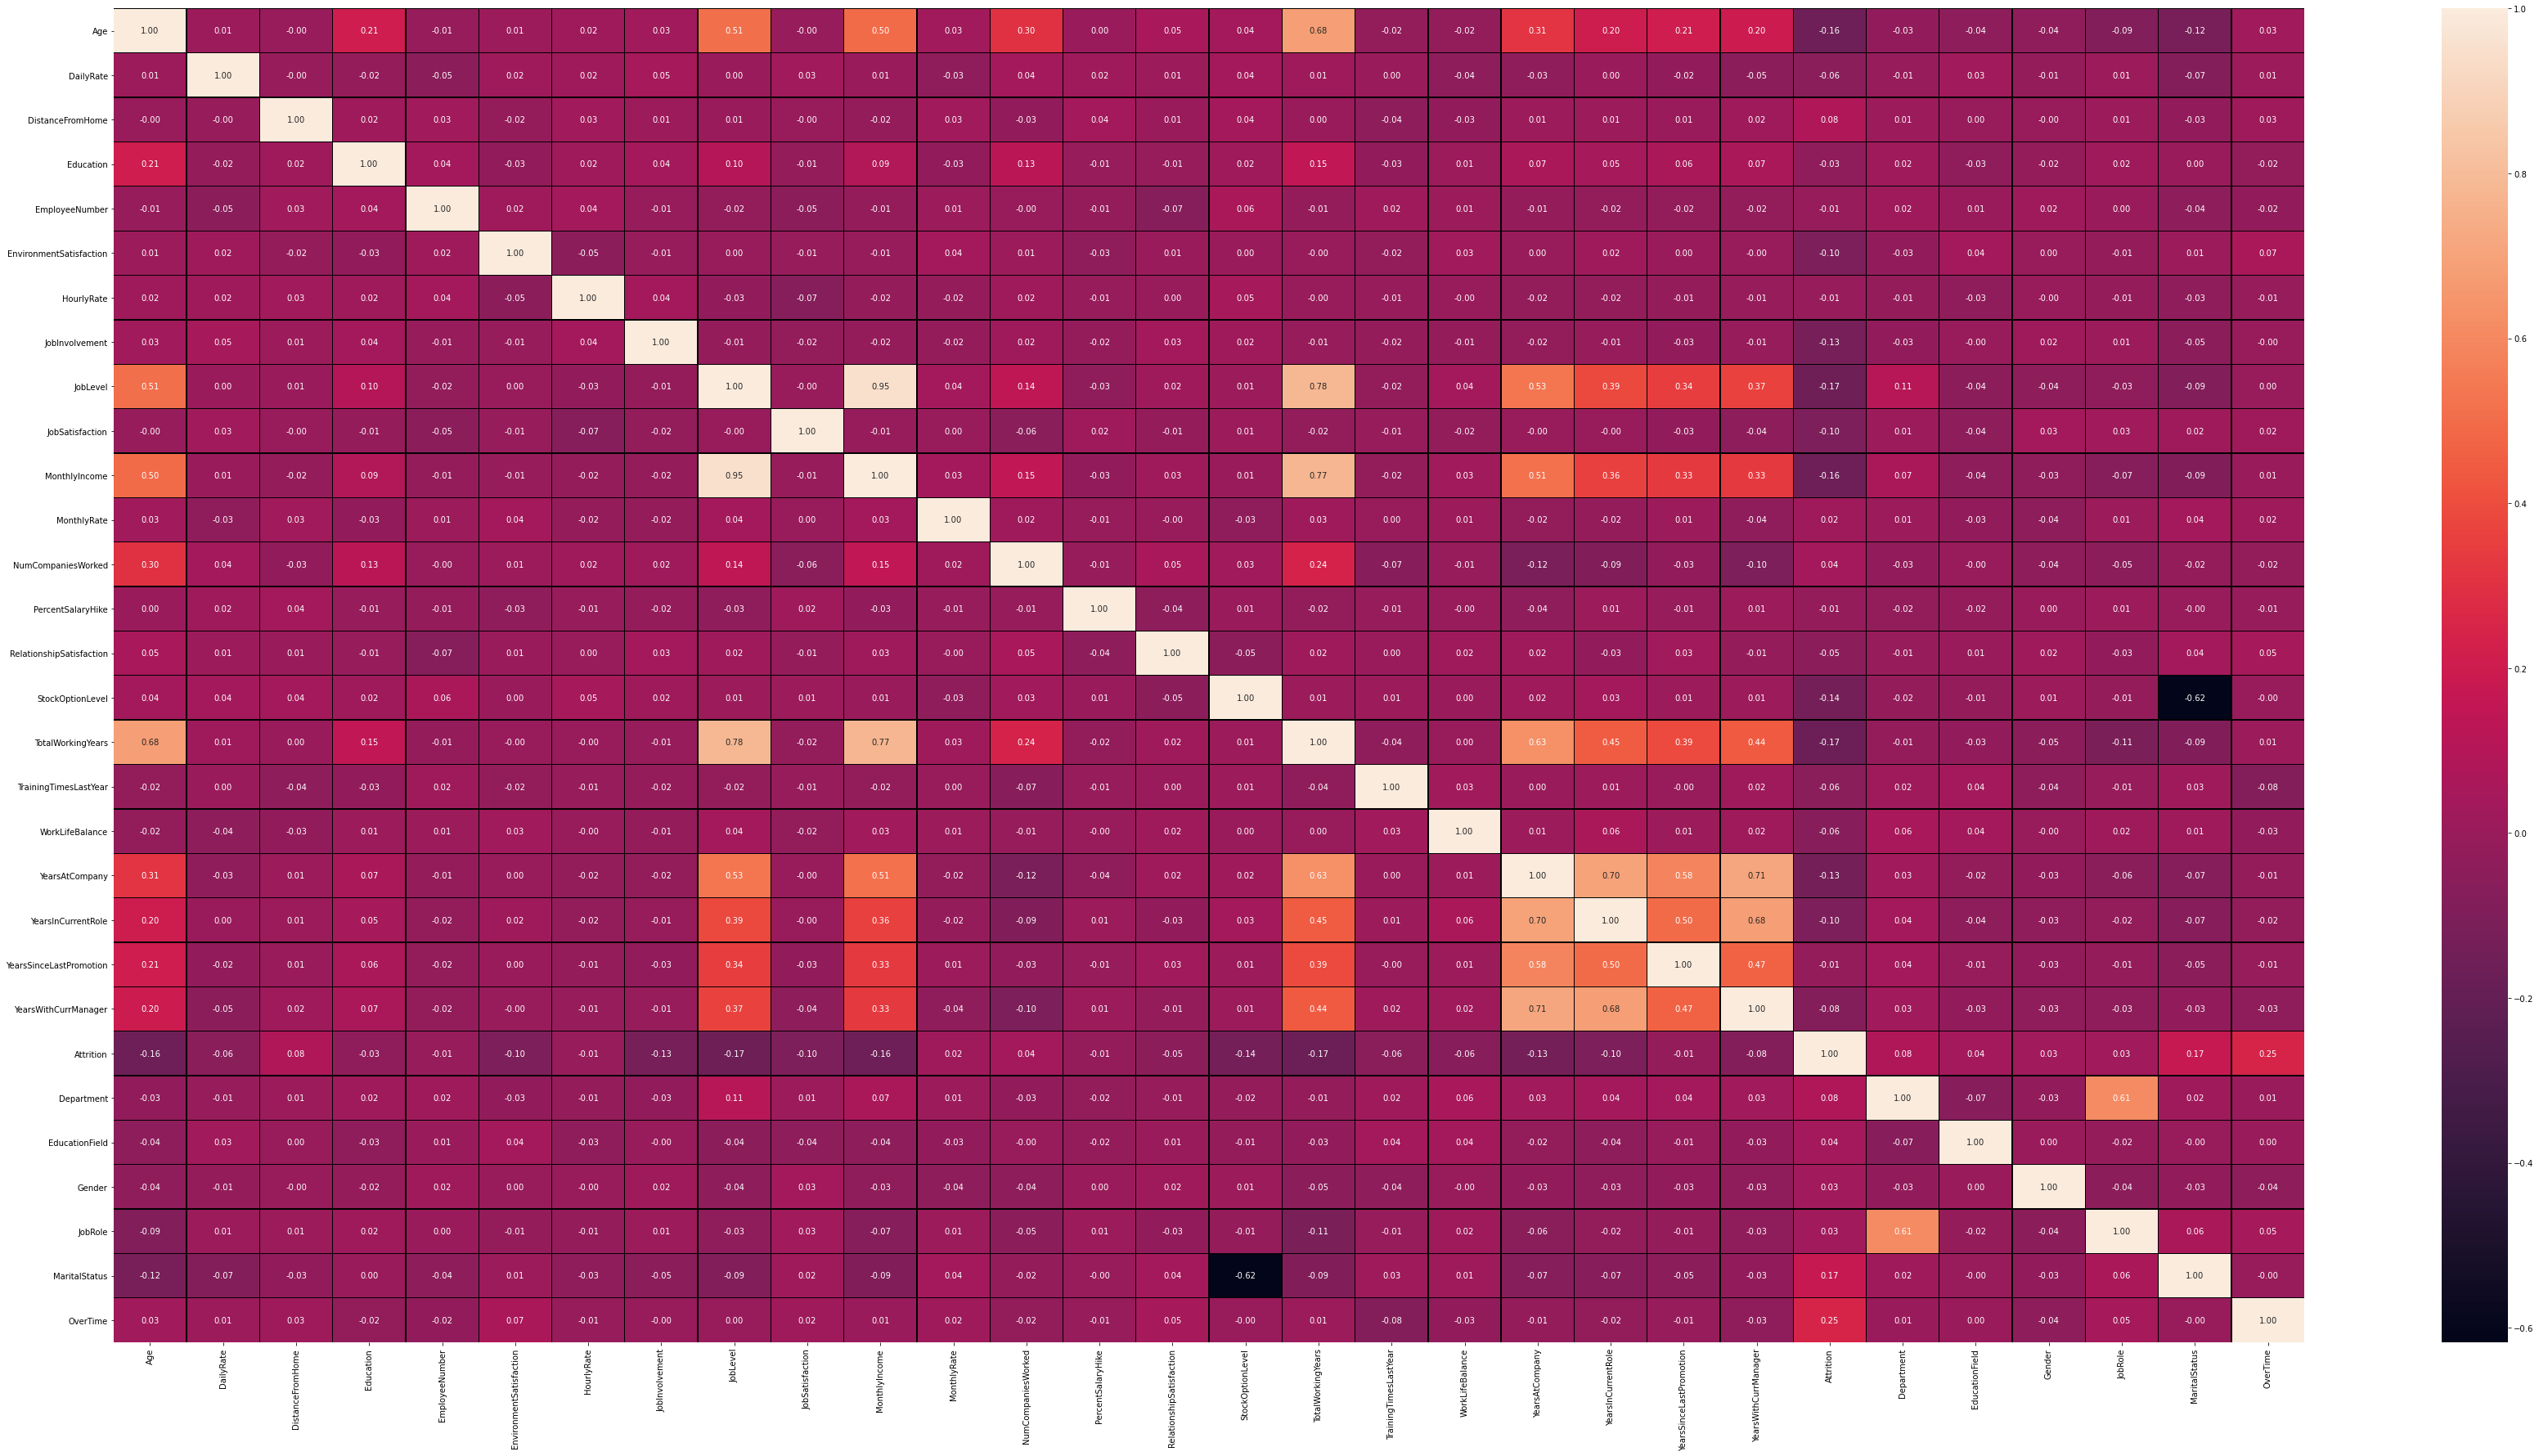

In [35]:
#heat map
plt.figure(figsize=(60,30))
sns.heatmap(data.corr(),annot=True,linewidths=0.3,linecolor='black',fmt='0.2f')

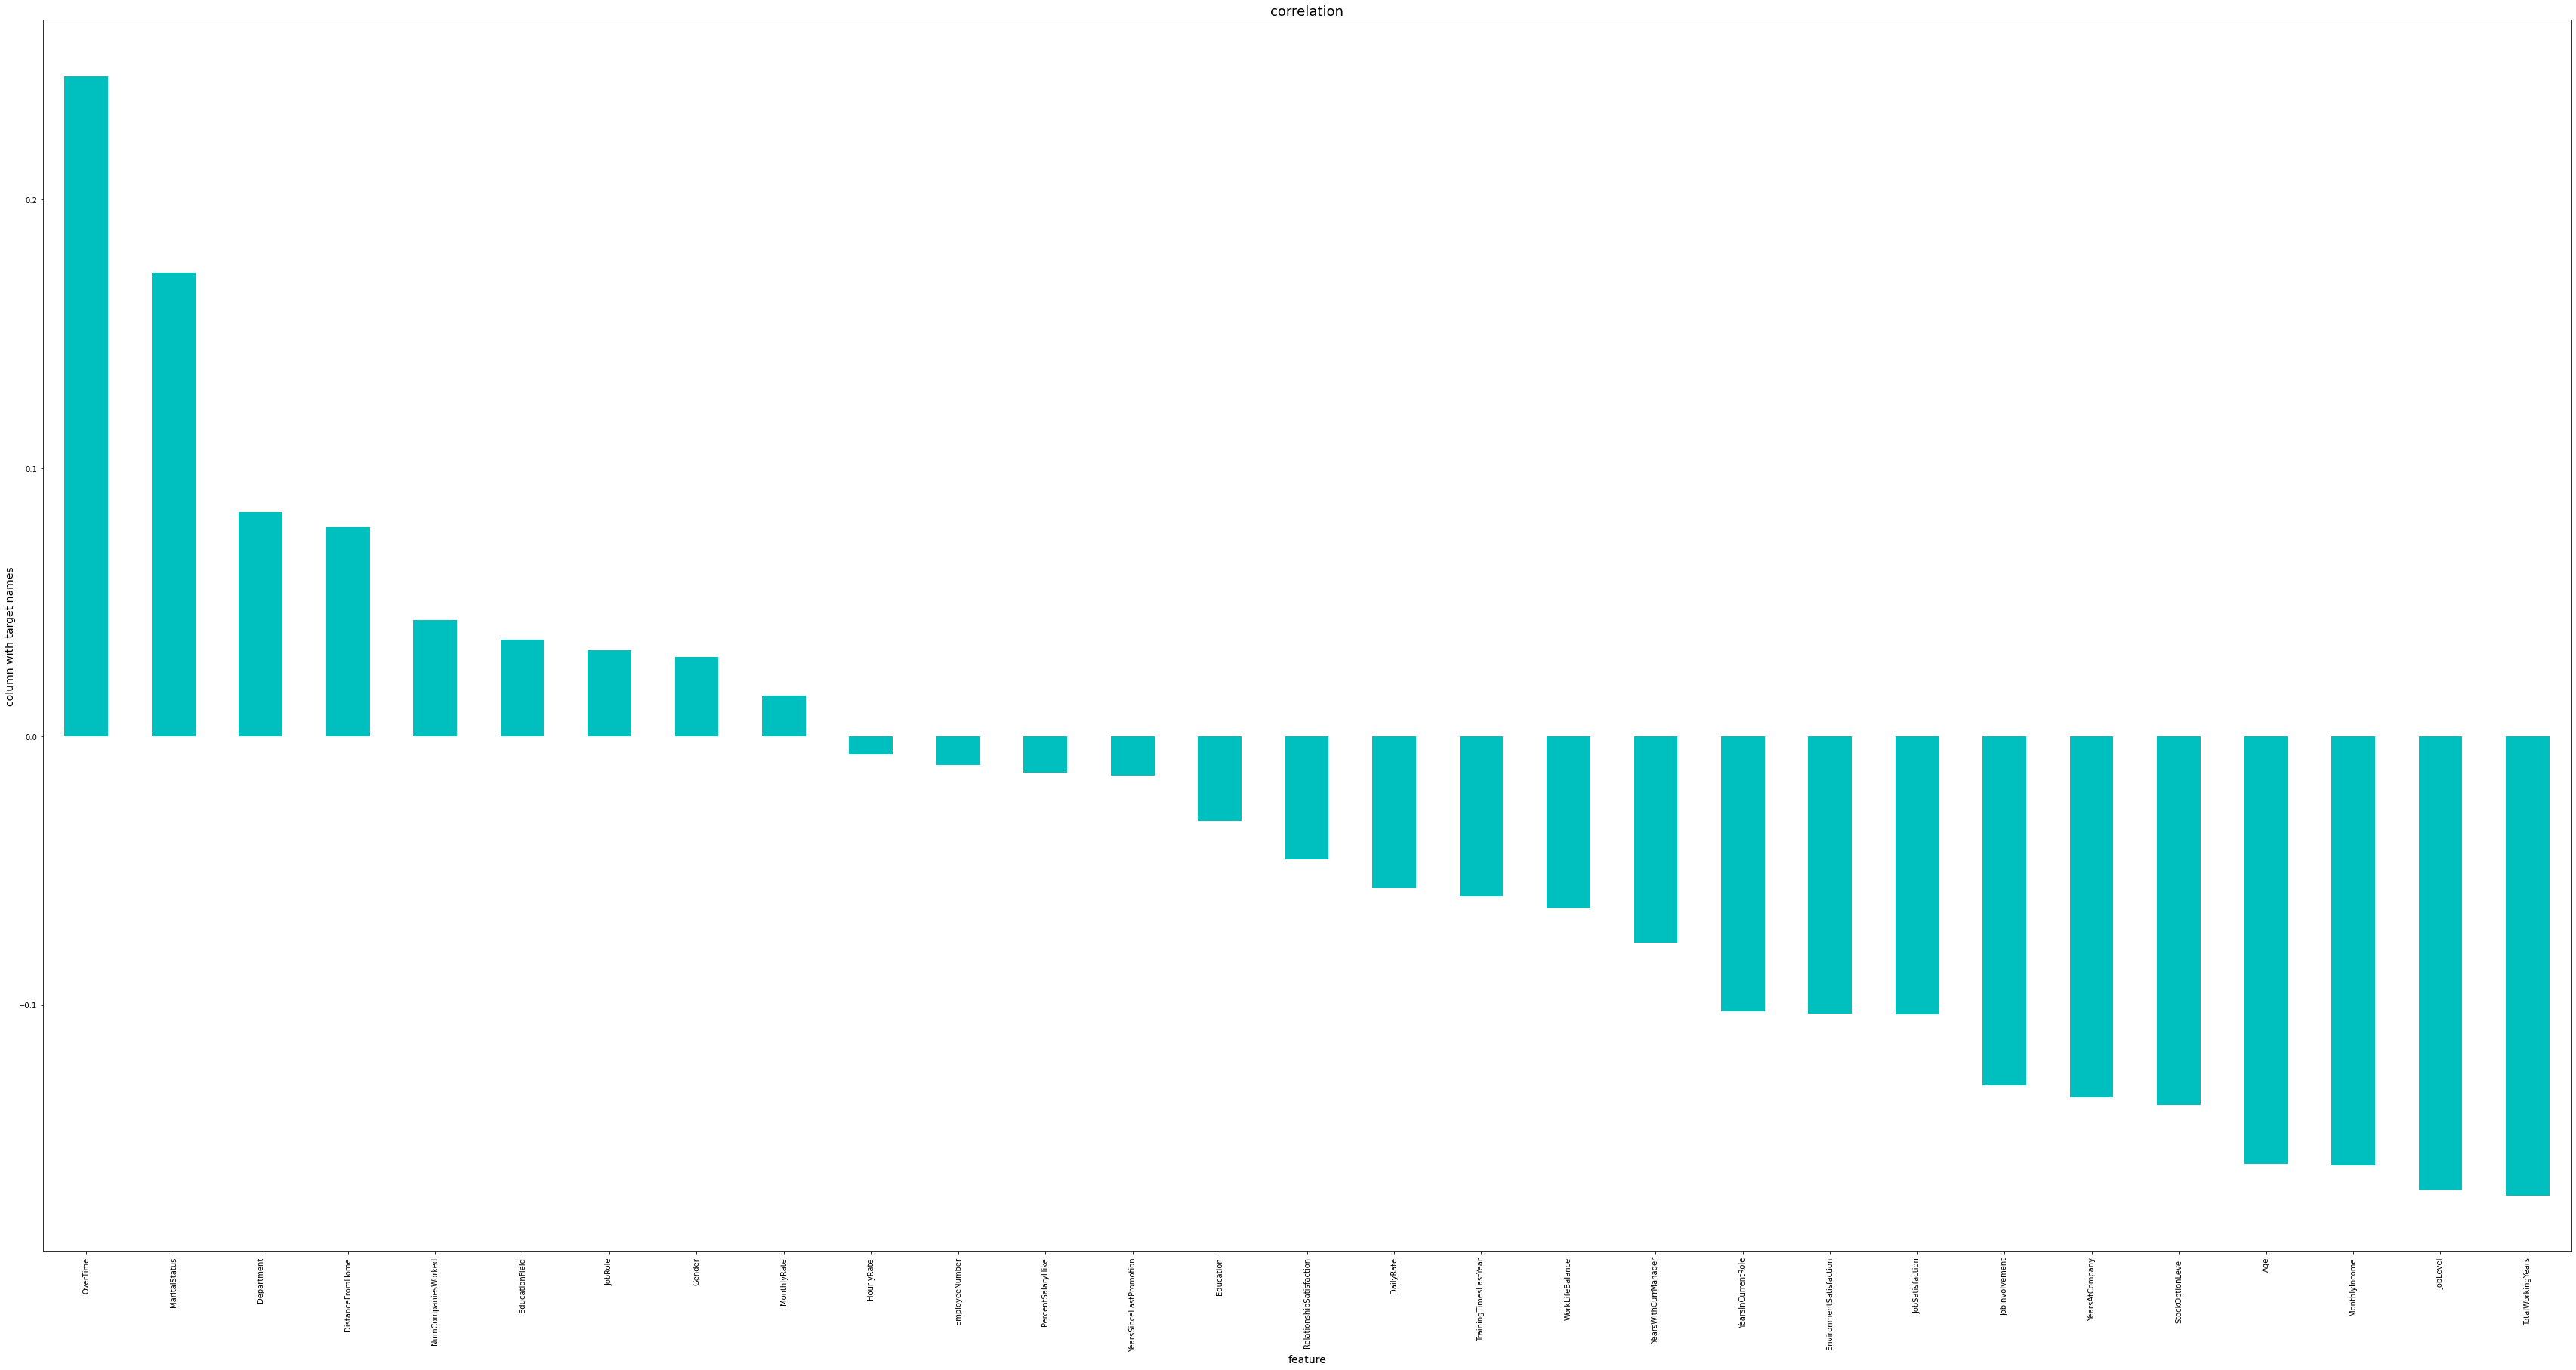

In [36]:
plt.figure(figsize=(60,30))
data.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
data.shape

(1470, 30)

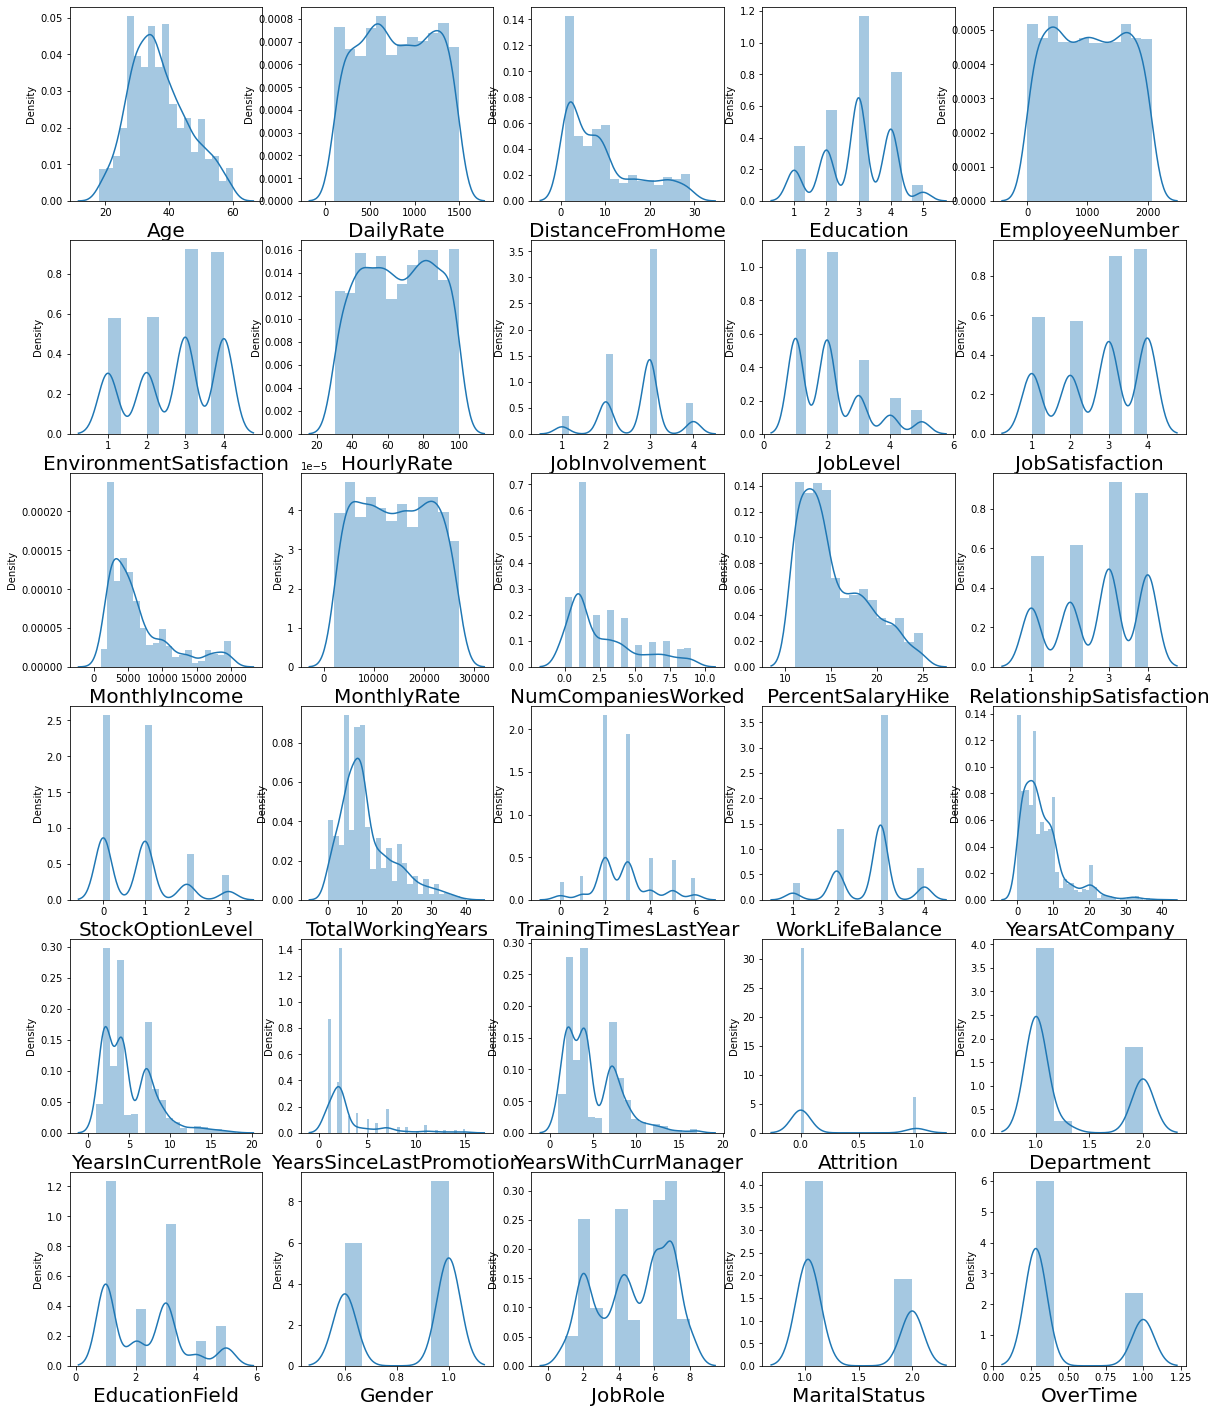

In [39]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [40]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([  28,   45,   45,   62,   62,   63,   64,   85,   98,   98,  110,
         123,  123,  123,  126,  126,  126,  153,  178,  187,  187,  187,
         190,  190,  218,  231,  231,  237,  237,  270,  270,  281,  326,
         386,  386,  401,  411,  417,  425,  425,  427,  445,  466,  473,
         477,  535,  561,  561,  584,  592,  595,  595,  595,  595,  616,
         624,  635,  653,  653,  677,  686,  701,  716,  746,  749,  752,
         752,  799,  838,  838,  861,  861,  861,  875,  875,  894,  914,
         914,  918,  922,  926,  926,  937,  956,  962,  976,  976, 1008,
        1024, 1043, 1078, 1078, 1086, 1086, 1093, 1111, 1116, 1116, 1135,
        1138, 1138, 1150, 1156, 1156, 1184, 1221, 1221, 1223, 1242, 1295,
        1301, 1301, 1301, 1303, 1327, 1330, 1331, 1348, 1351, 1401, 1414,
        1430, 1443], dtype=int64),
 array([22, 20, 21, 19, 21, 20, 21, 16, 16, 19, 21, 20, 21, 22, 16, 19, 21,
        22, 21, 16, 20, 22, 19, 20, 21, 20, 22, 19, 21, 16, 19, 20, 21, 21,

In [41]:
data_new_z=data[(z<3).all(axis=1)]
data_new_z

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,1,2,94,3,2,4,...,4.000000,2.187755,5.000000,1,2.0,1.0,0.6,7.000000,2.0,1.000000
1,49,279,8,1,2,3,61,2,2,2,...,7.000000,1.000000,7.000000,0,1.0,1.0,1.0,6.000000,1.0,0.282993
2,37,1373,2,2,4,4,92,2,1,3,...,4.229252,2.187755,4.123129,1,1.0,4.0,1.0,2.000000,2.0,1.000000
3,33,1392,3,4,5,4,56,3,1,3,...,7.000000,3.000000,4.123129,0,1.0,1.0,0.6,6.000000,1.0,1.000000
4,27,591,2,1,7,1,40,3,1,2,...,2.000000,2.000000,2.000000,0,1.0,3.0,1.0,2.000000,1.0,0.282993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,2.000000,2.187755,3.000000,0,1.0,3.0,1.0,2.000000,1.0,0.282993
1466,39,613,6,1,2062,4,42,2,3,1,...,7.000000,1.000000,7.000000,0,1.0,3.0,1.0,4.458503,1.0,0.282993
1467,27,155,4,3,2064,2,87,4,2,2,...,2.000000,2.187755,3.000000,0,1.0,1.0,1.0,4.000000,1.0,1.000000
1468,49,1023,2,3,2065,4,63,2,2,2,...,6.000000,2.187755,8.000000,0,2.0,3.0,1.0,7.000000,1.0,0.282993


In [42]:
data_new_z.shape

(1383, 30)

In [43]:
data.loss=((1470-1387)/1470)*100
data.loss

5.646258503401361

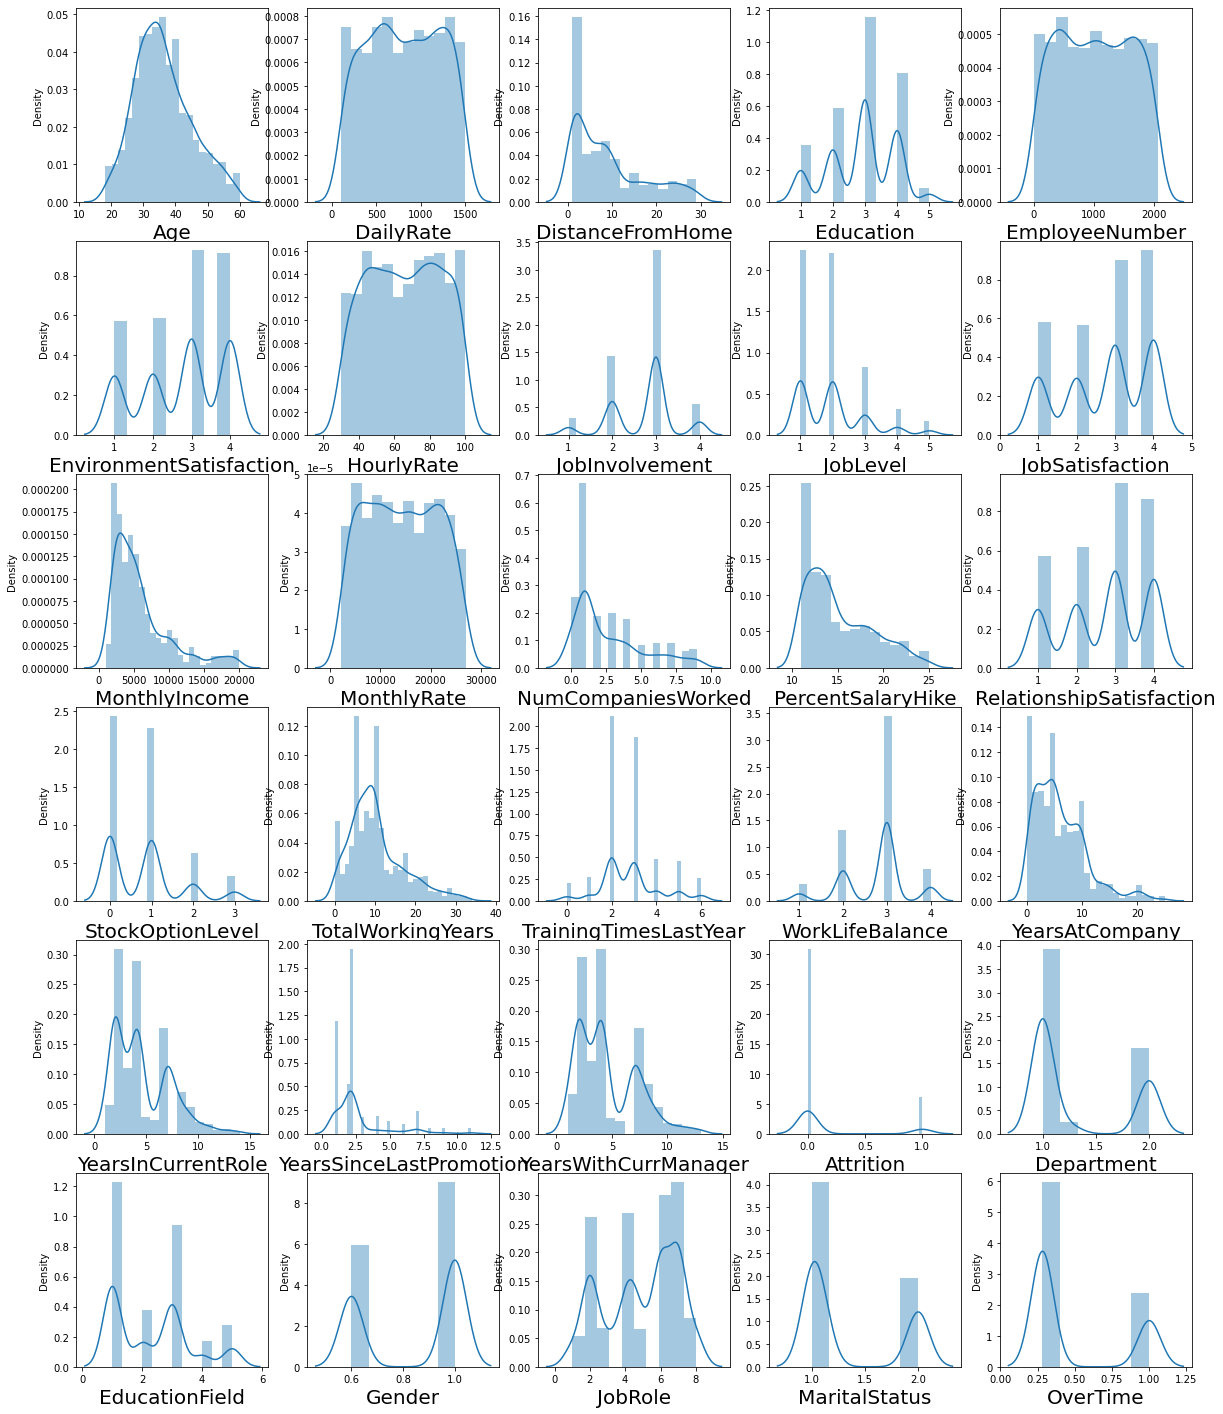

In [44]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data_new_z:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(data_new_z[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

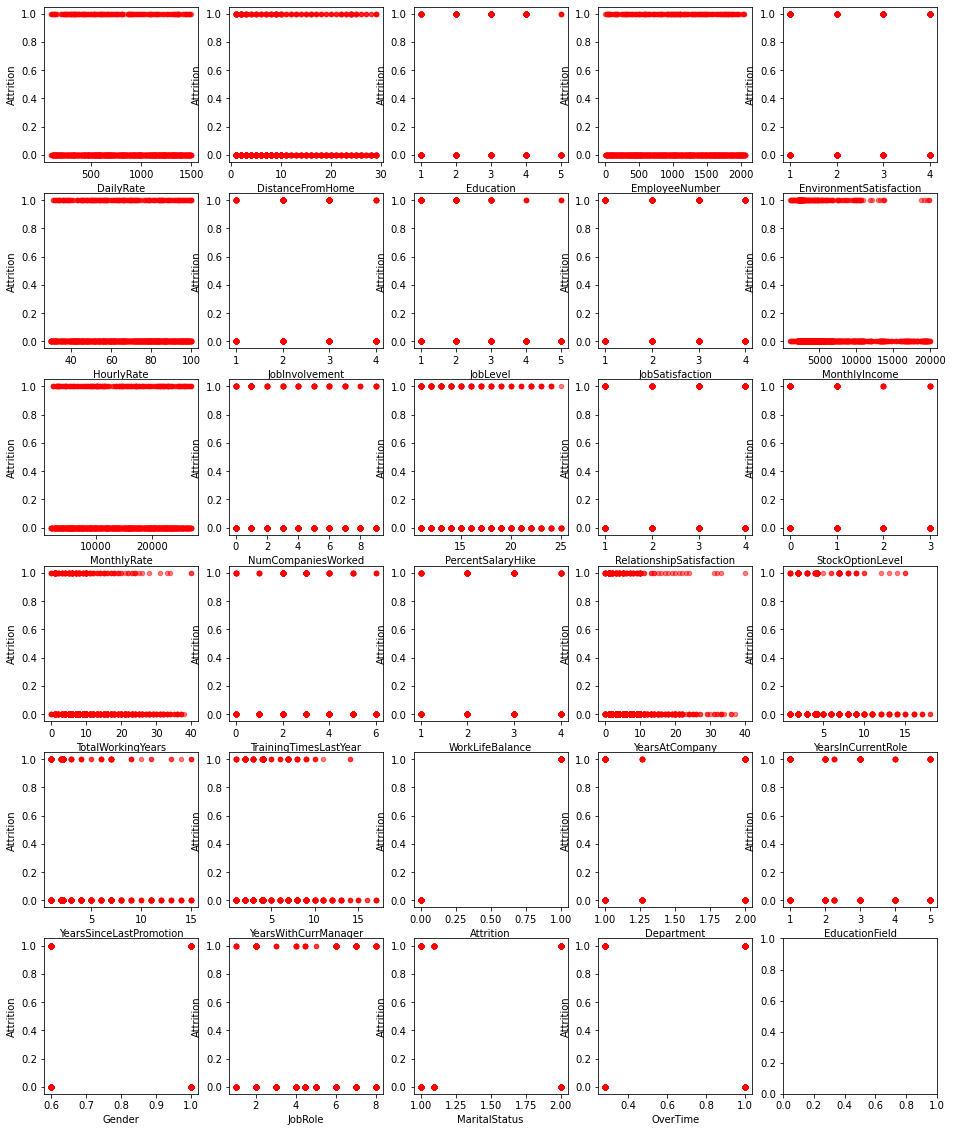

In [45]:
# setup figure
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(16, 20))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='Attrition', ax=ax, alpha=0.5, color='r')


In [46]:
data.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          1.181451
YearsSinceLastPromotion     2.310694
YearsWithCurrManager        1.076522
Attrition                   1.844366
Department                  0.819994
EducationField              0.597914
Gender                     -0.408665
J

In [47]:
df_features=data.drop('Attrition',axis=1)

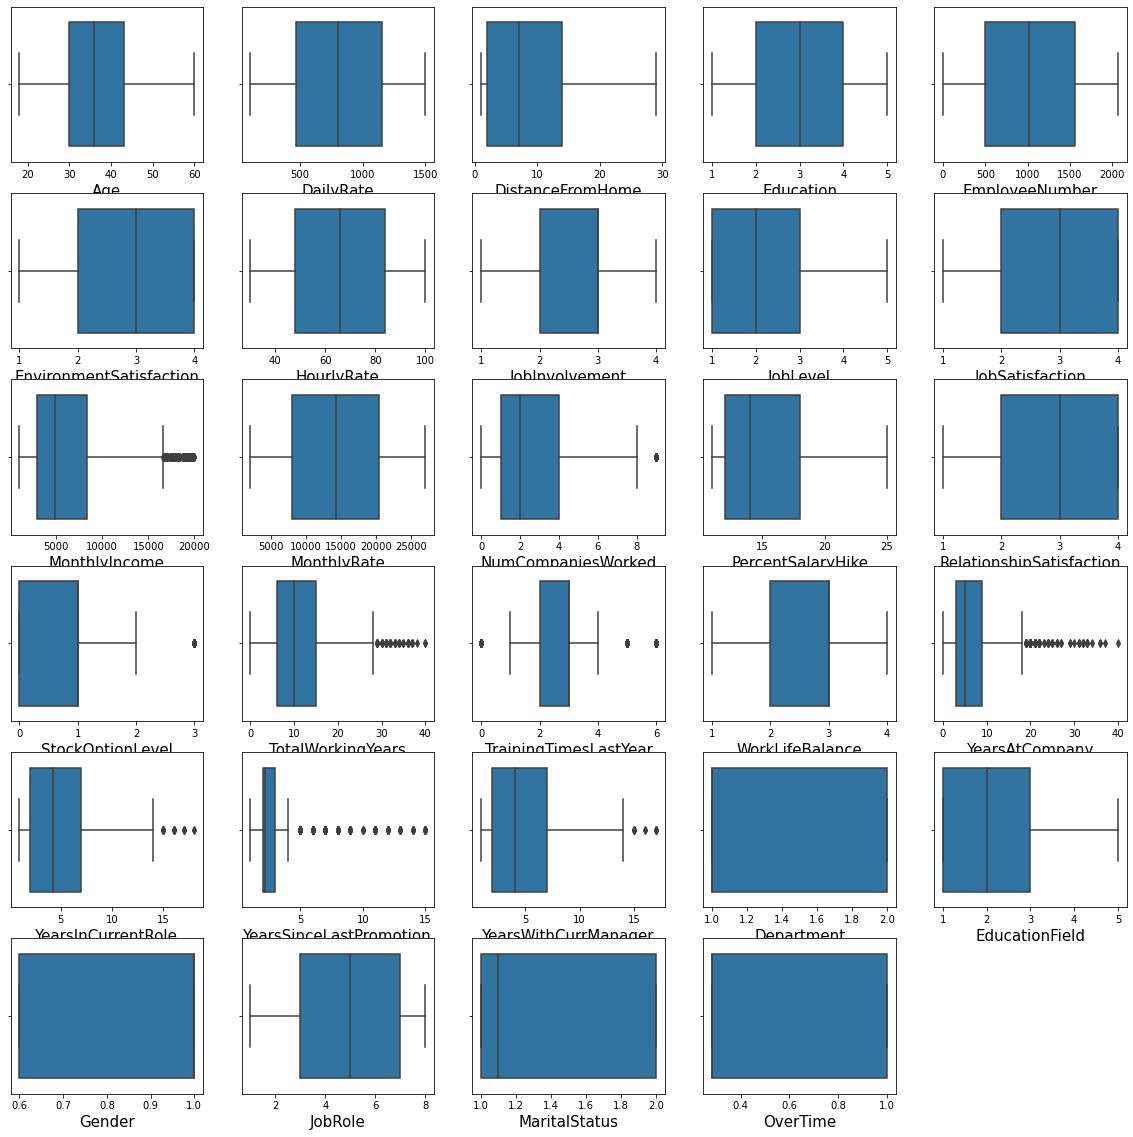

In [48]:
#visualize the outliers using boxplot
plt.figure(figsize=(20,20))
graph=1
for column in df_features:
    if graph<30:
        ax=plt.subplot(6,5,graph)
        sns.boxplot(df_features[column],orient='V')
        plt.xlabel(column,fontsize=15)
        graph+=1
plt.show()        

In [49]:
#find the IQR to identify outliers
#1st quantile
q1=data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)
#IQR
iqr=q3-q1
print(iqr)

Age                            13.000000
DailyRate                     692.000000
DistanceFromHome               12.000000
Education                       2.000000
EmployeeNumber               1064.500000
EnvironmentSatisfaction         2.000000
HourlyRate                     35.750000
JobInvolvement                  1.000000
JobLevel                        2.000000
JobSatisfaction                 2.000000
MonthlyIncome                5468.000000
MonthlyRate                 12414.500000
NumCompaniesWorked              3.000000
PercentSalaryHike               6.000000
RelationshipSatisfaction        2.000000
StockOptionLevel                1.000000
TotalWorkingYears               9.000000
TrainingTimesLastYear           1.000000
WorkLifeBalance                 1.000000
YearsAtCompany                  6.000000
YearsInCurrentRole              5.000000
YearsSinceLastPromotion         1.000000
YearsWithCurrManager            5.000000
Attrition                       0.000000
Department      

In [50]:
print(data < (q1 - 1.5 * iqr))

        Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0     False      False             False      False           False   
1     False      False             False      False           False   
2     False      False             False      False           False   
3     False      False             False      False           False   
4     False      False             False      False           False   
...     ...        ...               ...        ...             ...   
1465  False      False             False      False           False   
1466  False      False             False      False           False   
1467  False      False             False      False           False   
1468  False      False             False      False           False   
1469  False      False             False      False           False   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                       False       False           False     False   
1    

In [51]:
#validating outliers
MonthlyIncome_high=(q3.MonthlyIncome+(1.5*iqr.MonthlyIncome))
MonthlyIncome_high

16581.0

In [52]:
index=np.where(data['MonthlyIncome']>MonthlyIncome_high)
index

(array([  25,   29,   45,   62,  105,  106,  112,  119,  123,  147,  165,
         186,  187,  190,  194,  231,  233,  237,  244,  257,  263,  270,
         279,  280,  290,  314,  326,  329,  379,  392,  400,  411,  417,
         425,  429,  445,  466,  473,  477,  489,  497,  535,  538,  561,
         568,  584,  588,  592,  595,  609,  653,  699,  710,  714,  716,
         741,  746,  749,  755,  766,  770,  774,  799,  804,  810,  814,
         851,  858,  861,  867,  869,  894,  898,  899,  904,  907,  913,
         916,  918,  922,  936,  937,  945,  954,  955,  956,  999, 1008,
        1009, 1024, 1043, 1055, 1080, 1116, 1126, 1129, 1135, 1140, 1154,
        1184, 1185, 1225, 1242, 1264, 1277, 1330, 1331, 1348, 1351, 1374,
        1377, 1401, 1437, 1443], dtype=int64),)

this is the indexes in which dataof monthlyincome i.e outliers is beyond 16581.0 so lets will drop that indexes in further steps

In [53]:
data=data.drop(data.index[index])
data.shape

(1356, 30)

In [54]:
data.reset_index()

,index,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0,41,1102,1,2,1,2,94,3,2,...,4.000000,2.187755,5.000000,1,2.0,1.0,0.6,7.000000,2.0,1.000000
1,1,49,279,8,1,2,3,61,2,2,...,7.000000,1.000000,7.000000,0,1.0,1.0,1.0,6.000000,1.0,0.282993
2,2,37,1373,2,2,4,4,92,2,1,...,4.229252,2.187755,4.123129,1,1.0,4.0,1.0,2.000000,2.0,1.000000
3,3,33,1392,3,4,5,4,56,3,1,...,7.000000,3.000000,4.123129,0,1.0,1.0,0.6,6.000000,1.0,1.000000
4,4,27,591,2,1,7,1,40,3,1,...,2.000000,2.000000,2.000000,0,1.0,3.0,1.0,2.000000,1.0,0.282993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1465,36,884,23,2,2061,3,41,4,2,...,2.000000,2.187755,3.000000,0,1.0,3.0,1.0,2.000000,1.0,0.282993
1352,1466,39,613,6,1,2062,4,42,2,3,...,7.000000,1.000000,7.000000,0,1.0,3.0,1.0,4.458503,1.0,0.282993
1353,1467,27,155,4,3,2064,2,87,4,2,...,2.000000,2.187755,3.000000,0,1.0,1.0,1.0,4.000000,1.0,1.000000
1354,1468,49,1023,2,3,2065,4,63,2,2,...,6.000000,2.187755,8.000000,0,2.0,3.0,1.0,7.000000,1.0,0.282993


In [55]:
NumCompaniesWorked_high=(q3.NumCompaniesWorked +(1.5*iqr.NumCompaniesWorked))
NumCompaniesWorked_high

8.5

In [56]:
index=np.where(data['NumCompaniesWorked']>NumCompaniesWorked_high)
index

(array([   4,   36,   47,   91,  114,  183,  193,  226,  263,  306,  343,
         344,  356,  363,  370,  405,  411,  420,  484,  498,  501,  508,
         530,  548,  567,  573,  609,  662,  697,  717,  727,  750,  771,
         847,  864,  871,  913,  945, 1023, 1047, 1063, 1073, 1118, 1159,
        1191, 1248, 1329], dtype=int64),)

this is the indexes in which dataof monthlyincome i.e outliers is beyond 8.5 so lets will drop that indexes in further steps

In [57]:
data=data.drop(data.index[index])
data.shape

(1309, 30)

In [58]:
data.reset_index()

,index,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0,41,1102,1,2,1,2,94,3,2,...,4.000000,2.187755,5.000000,1,2.0,1.0,0.6,7.000000,2.0,1.000000
1,1,49,279,8,1,2,3,61,2,2,...,7.000000,1.000000,7.000000,0,1.0,1.0,1.0,6.000000,1.0,0.282993
2,2,37,1373,2,2,4,4,92,2,1,...,4.229252,2.187755,4.123129,1,1.0,4.0,1.0,2.000000,2.0,1.000000
3,3,33,1392,3,4,5,4,56,3,1,...,7.000000,3.000000,4.123129,0,1.0,1.0,0.6,6.000000,1.0,1.000000
4,5,32,1005,2,2,8,4,79,3,1,...,7.000000,3.000000,6.000000,0,1.0,1.0,1.0,2.000000,2.0,0.282993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1465,36,884,23,2,2061,3,41,4,2,...,2.000000,2.187755,3.000000,0,1.0,3.0,1.0,2.000000,1.0,0.282993
1305,1466,39,613,6,1,2062,4,42,2,3,...,7.000000,1.000000,7.000000,0,1.0,3.0,1.0,4.458503,1.0,0.282993
1306,1467,27,155,4,3,2064,2,87,4,2,...,2.000000,2.187755,3.000000,0,1.0,1.0,1.0,4.000000,1.0,1.000000
1307,1468,49,1023,2,3,2065,4,63,2,2,...,6.000000,2.187755,8.000000,0,2.0,3.0,1.0,7.000000,1.0,0.282993


In [59]:
YearsWithCurrManager_high=(q3.YearsWithCurrManager+(1.5*iqr.YearsWithCurrManager))
YearsWithCurrManager_high

14.5

In [60]:
index=np.where(data['YearsWithCurrManager']>YearsWithCurrManager_high)
index

(array([ 26, 138, 344, 542, 559, 608, 771, 813, 948], dtype=int64),)

In [61]:
data=data.drop(data.index[index])
data.shape

(1300, 30)

In [62]:
YearsSinceLastPromotion_high=(q3.YearsSinceLastPromotion+(1.5*iqr.YearsSinceLastPromotion))
YearsSinceLastPromotion_high

4.5

In [63]:
index=np.where(data['YearsSinceLastPromotion']>YearsSinceLastPromotion_high)
index

(array([   8,   14,   24,   40,   48,   53,   54,   55,   56,   80,   82,
          85,   86,   99,  104,  109,  111,  114,  119,  122,  149,  154,
         155,  160,  186,  187,  194,  199,  202,  218,  222,  227,  231,
         235,  238,  239,  244,  245,  247,  251,  255,  257,  261,  267,
         275,  277,  280,  282,  288,  313,  315,  326,  341,  351,  372,
         374,  375,  379,  382,  388,  390,  392,  395,  405,  409,  410,
         424,  440,  441,  444,  446,  448,  452,  462,  463,  468,  478,
         493,  524,  528,  531,  532,  535,  555,  560,  570,  576,  592,
         598,  606,  608,  611,  616,  617,  640,  649,  655,  658,  660,
         666,  673,  675,  677,  687,  697,  711,  722,  733,  741,  764,
         771,  775,  778,  780,  797,  800,  801,  808,  810,  817,  819,
         820,  824,  825,  829,  834,  836,  838,  846,  848,  849,  855,
         867,  875,  895,  913,  920,  944,  945,  946,  947,  953,  954,
         955,  956,  959,  963,  966, 

In [64]:
data=data.drop(data.index[index])
data.shape

(1100, 30)

In [65]:
YearsInCurrentRole_high=(q3.YearsInCurrentRole+(1.5*iqr.YearsInCurrentRole))
YearsInCurrentRole_high

14.5

In [66]:
index=np.where(data['YearsInCurrentRole']>YearsInCurrentRole_high)
index

(array([ 847,  988, 1068], dtype=int64),)

In [67]:
data=data.drop(data.index[index])
data.shape

(1097, 30)

In [68]:
YearsAtCompany_high=(q3.YearsAtCompany+(1.5*iqr.YearsAtCompany))
YearsAtCompany_high

18.0

In [69]:
index=np.where(data['YearsAtCompany']>YearsAtCompany_high)
index

(array([  15,   76,  114,  203,  217,  221,  292,  388,  506,  528,  562,
         583,  707,  717,  733,  823, 1022, 1047, 1074], dtype=int64),)

In [70]:
data=data.drop(data.index[index])
data.shape

(1078, 30)

In [71]:
TotalWorkingYears_high=(q3.TotalWorkingYears+(1.5*iqr.TotalWorkingYears))
TotalWorkingYears_high

28.5

In [72]:
index=np.where(data['TotalWorkingYears']>TotalWorkingYears_high)
index

(array([ 67, 298, 311, 387, 399, 453, 456, 475, 547, 654, 700, 727, 766,
        855, 865], dtype=int64),)

In [73]:
data=data.drop(data.index[index])
data.shape

(1063, 30)

In [74]:
StockOptionLevel_high=(q3.StockOptionLevel+(1.5*iqr.StockOptionLevel))
StockOptionLevel_high

2.5

In [75]:
index=np.where(data['StockOptionLevel']>StockOptionLevel_high)
index

(array([   5,   47,   65,   71,   89,  106,  144,  154,  167,  180,  211,
         217,  229,  239,  242,  300,  309,  314,  423,  442,  464,  473,
         494,  528,  558,  563,  571,  577,  582,  615,  627,  628,  629,
         630,  646,  652,  686,  693,  696,  704,  740,  769,  784,  809,
         823,  839,  856,  864,  870,  875,  881,  895,  900,  905,  909,
         917,  925,  944,  958,  959,  966, 1011, 1014, 1022, 1039, 1051],
       dtype=int64),)

In [76]:
data=data.drop(data.index[index])
data.shape

(997, 30)

In [77]:
TrainingTimesLastYear_high=(q3.TrainingTimesLastYear+(1.5*iqr.TrainingTimesLastYear))
TrainingTimesLastYear_high

4.5

In [78]:
index=np.where(data['TrainingTimesLastYear']>TrainingTimesLastYear_high)
index

(array([  7,  12,  15,  18,  22,  23,  24,  31,  73,  78,  83, 113, 122,
        130, 133, 135, 139, 140, 151, 152, 154, 160, 161, 169, 177, 185,
        186, 190, 193, 200, 213, 221, 233, 239, 243, 245, 254, 255, 267,
        268, 271, 276, 279, 284, 296, 312, 322, 330, 347, 351, 356, 371,
        372, 374, 385, 389, 414, 424, 431, 464, 470, 474, 478, 480, 481,
        490, 500, 511, 514, 517, 526, 529, 531, 533, 543, 556, 570, 586,
        593, 606, 609, 610, 619, 628, 643, 653, 661, 670, 692, 701, 703,
        722, 726, 729, 730, 743, 747, 755, 756, 757, 765, 774, 778, 781,
        790, 791, 796, 800, 811, 830, 840, 842, 855, 859, 863, 866, 868,
        871, 877, 912, 913, 940, 941, 945, 949, 955, 957, 964, 972, 977,
        986, 993], dtype=int64),)

In [79]:
data=data.drop(data.index[index])
data.shape

(865, 30)

In [80]:
data.reset_index()

,index,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0,41,1102,1,2,1,2,94,3,2,...,4.000000,2.187755,5.000000,1,2.0,1.0,0.6,7.0,2.0,1.000000
1,1,49,279,8,1,2,3,61,2,2,...,7.000000,1.000000,7.000000,0,1.0,1.0,1.0,6.0,1.0,0.282993
2,2,37,1373,2,2,4,4,92,2,1,...,4.229252,2.187755,4.123129,1,1.0,4.0,1.0,2.0,2.0,1.000000
3,3,33,1392,3,4,5,4,56,3,1,...,7.000000,3.000000,4.123129,0,1.0,1.0,0.6,6.0,1.0,1.000000
4,5,32,1005,2,2,8,4,79,3,1,...,7.000000,3.000000,6.000000,0,1.0,1.0,1.0,2.0,2.0,0.282993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,1464,26,1167,5,3,2060,4,30,2,1,...,2.000000,2.187755,4.123129,0,2.0,4.0,0.6,8.0,2.0,0.282993
861,1465,36,884,23,2,2061,3,41,4,2,...,2.000000,2.187755,3.000000,0,1.0,3.0,1.0,2.0,1.0,0.282993
862,1467,27,155,4,3,2064,2,87,4,2,...,2.000000,2.187755,3.000000,0,1.0,1.0,1.0,4.0,1.0,1.000000
863,1468,49,1023,2,3,2065,4,63,2,2,...,6.000000,2.187755,8.000000,0,2.0,3.0,1.0,7.0,1.0,0.282993


In [81]:
data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

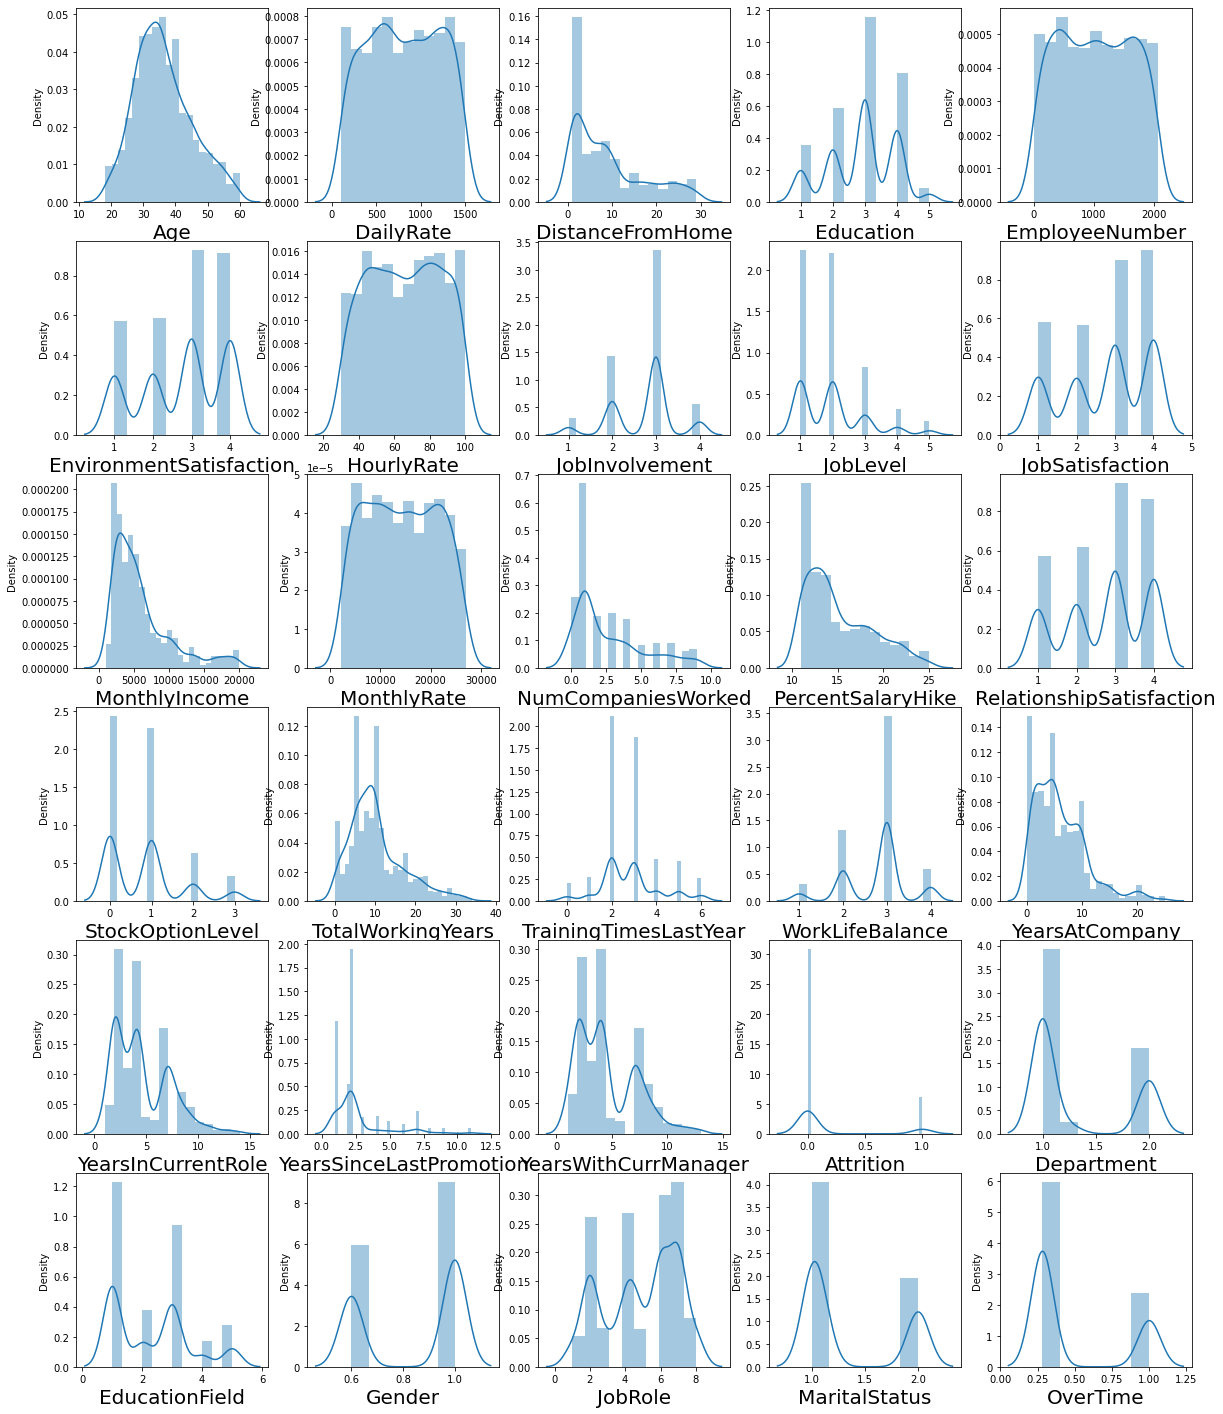

In [82]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data_new_z:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(data_new_z[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [83]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,...,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,35.219653,800.958382,9.292486,2.862428,1022.808092,2.709827,66.352601,2.728324,1.708671,2.735260,...,4.001920,1.908869,3.992808,0.182659,1.315191,2.290129,0.850173,4.971981,1.383280,0.494365
std,8.762178,400.464078,8.061755,1.028882,606.491392,1.105629,20.307117,0.716179,0.753529,1.101543,...,2.326649,0.715947,2.336248,0.386610,0.455900,1.331235,0.193716,2.115363,0.468371,0.327110
min,18.000000,103.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.600000,1.000000,1.000000,0.282993
25%,29.000000,464.000000,2.000000,2.000000,487.000000,2.000000,49.000000,2.000000,1.000000,2.000000,...,2.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.600000,3.000000,1.000000,0.282993
50%,34.000000,810.000000,7.000000,3.000000,1006.000000,3.000000,67.000000,3.000000,2.000000,3.000000,...,4.000000,2.187755,4.000000,0.000000,1.000000,2.000000,1.000000,6.000000,1.097279,0.282993
75%,40.000000,1153.000000,14.000000,4.000000,1555.000000,4.000000,84.000000,3.000000,2.000000,4.000000,...,4.229252,2.187755,4.123129,0.000000,2.000000,3.000000,1.000000,7.000000,2.000000,1.000000
max,60.000000,1498.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,4.000000,4.000000,...,14.000000,4.000000,13.000000,1.000000,2.000000,5.000000,1.000000,8.000000,2.000000,1.000000


In [84]:
data.shape

(865, 30)

In [85]:
#devide data set into feature and label
y=data['Attrition']
x=data.drop(['Attrition'],axis=1)

In [86]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [87]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [88]:
x

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,1,2,94,3,2,4,...,6,4.000000,2.187755,5.000000,2.0,1.0,0.6,7.0,2.0,1.000000
1,49,279,8,1,2,3,61,2,2,2,...,10,7.000000,1.000000,7.000000,1.0,1.0,1.0,6.0,1.0,0.282993
2,37,1373,2,2,4,4,92,2,1,3,...,0,4.229252,2.187755,4.123129,1.0,4.0,1.0,2.0,2.0,1.000000
3,33,1392,3,4,5,4,56,3,1,3,...,8,7.000000,3.000000,4.123129,1.0,1.0,0.6,6.0,1.0,1.000000
5,32,1005,2,2,8,4,79,3,1,4,...,7,7.000000,3.000000,6.000000,1.0,1.0,1.0,2.0,2.0,0.282993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,26,1167,5,3,2060,4,30,2,1,3,...,4,2.000000,2.187755,4.123129,2.0,4.0,0.6,8.0,2.0,0.282993
1465,36,884,23,2,2061,3,41,4,2,4,...,5,2.000000,2.187755,3.000000,1.0,3.0,1.0,2.0,1.0,0.282993
1467,27,155,4,3,2064,2,87,4,2,2,...,6,2.000000,2.187755,3.000000,1.0,1.0,1.0,4.0,1.0,1.000000
1468,49,1023,2,3,2065,4,63,2,2,2,...,9,6.000000,2.187755,8.000000,2.0,3.0,1.0,7.0,1.0,0.282993


In [89]:
y

0       1
1       0
2       1
3       0
5       0
       ..
1464    0
1465    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 865, dtype: int32

In [90]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


In [91]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression()]
max_accuracy_score = 0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)
        

accuracy score correspond to random state  40 is 0.7552447552447552
accuracy score correspond to random state  40 is 0.7657342657342657
accuracy score correspond to random state  40 is 0.7797202797202797
accuracy score correspond to random state  41 is 0.7202797202797203
accuracy score correspond to random state  41 is 0.8041958041958042
accuracy score correspond to random state  41 is 0.8216783216783217
accuracy score correspond to random state  42 is 0.7412587412587412
accuracy score correspond to random state  42 is 0.8041958041958042
accuracy score correspond to random state  42 is 0.8356643356643356
accuracy score correspond to random state  43 is 0.7832167832167832
accuracy score correspond to random state  43 is 0.7762237762237763
accuracy score correspond to random state  43 is 0.8251748251748252
accuracy score correspond to random state  44 is 0.7832167832167832
accuracy score correspond to random state  44 is 0.7937062937062938
accuracy score correspond to random state  44 is

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 0.66007455,  0.7521668 , -1.02921544, ...,  0.95926465,
         1.31749481,  1.54665991],
       [ 1.57361772, -1.30413783, -0.16041585, ...,  0.48625898,
        -0.81879936, -0.64655455],
       [ 0.20330296,  1.42927318, -0.90510121, ..., -1.4057637 ,
         1.31749481,  1.54665991],
       ...,
       [-0.93862601, -1.61395773, -0.65687275, ..., -0.45975236,
        -0.81879936,  1.54665991],
       [ 1.57361772,  0.55478154, -0.90510121, ...,  0.95926465,
        -0.81879936, -0.64655455],
       [-0.13927573, -0.43214474, -0.16041585, ..., -1.4057637 ,
        -0.81879936, -0.64655455]])

In [94]:
#lets split data in test and training set
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.33,random_state=46)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR

In [96]:
log_regression=LogisticRegression()
log_regression.fit(x_train,y_train)

LogisticRegression()

In [97]:
with open ('model_attrition.say','wb')as f:
    pickle.dump(log_regression,f)
with open ('standardscalar.sav','wb')as f:
    pickle.dump(scalar,f)    

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
y_pred=log_regression.predict(x_test)

In [100]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8986013986013986